In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
df=pd.read_excel("/Users/logan/Downloads/2024 Hackathon Dataset.xlsx")

Daily Variability Metrics
Valentino Daily Generation Standard Deviation: 4.325623145619205
Mantero Daily Generation Standard Deviation: 1.6239314812325172
Howling Gale Daily Generation Standard Deviation: 2.1140659168256493
Ventus Village Daily Generation Standard Deviation: 4.425762673268219
Salmon Valley Daily Generation Standard Deviation: 6.260824224882625


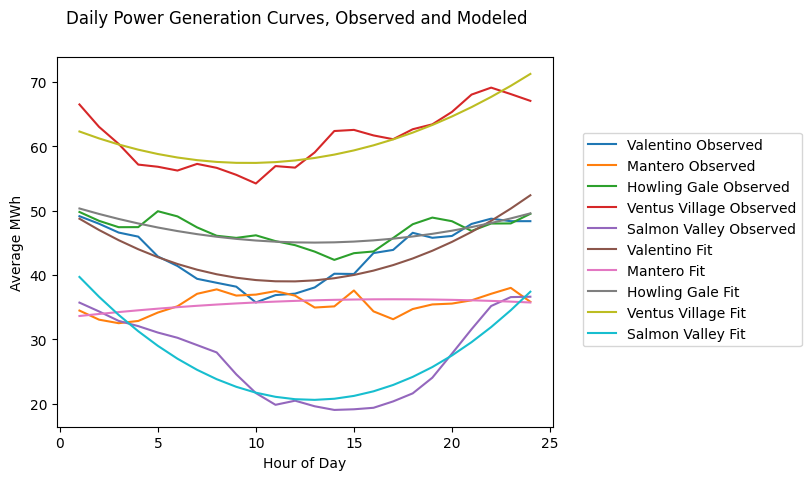

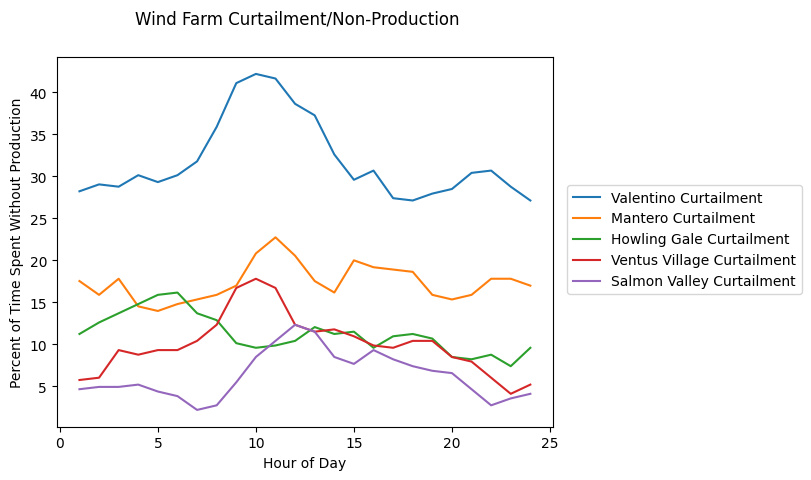

In [181]:
Valentino_counts=[]
Mantero_counts=[]
Howling_Gale_counts=[]
Ventus_Village_counts=[]
Salmon_Valley_counts=[]
array_vals=[]
for i in range (1,25):
    array_val = df.loc[df['Hour Ending']==i].loc[:,['Valentino Gen (MWh)\nMWh that were delivered to the grid from the project (substation level generation)','Mantero Gen (MWh)','Howling Gale Gen (MWh)','Ventus Village Gen (MWh)','Salmon Valley Gen (MWh)']]
    Valentino_counts.append(365-array_val['Valentino Gen (MWh)\nMWh that were delivered to the grid from the project (substation level generation)'].value_counts()[0])
    Mantero_counts.append(365-array_val['Mantero Gen (MWh)'].value_counts()[0])
    Howling_Gale_counts.append(365-array_val['Howling Gale Gen (MWh)'].value_counts()[0])
    Ventus_Village_counts.append(365-array_val['Ventus Village Gen (MWh)'].value_counts()[0])
    Salmon_Valley_counts.append(365-array_val['Salmon Valley Gen (MWh)'].value_counts()[0])
    array_val=array_val.sum().to_frame().T
    array_vals.append(array_val)   
daily_sums=pd.concat(array_vals)
Valentino_Gen=np.divide(np.array(daily_sums["Valentino Gen (MWh)\nMWh that were delivered to the grid from the project (substation level generation)"]),np.array(Valentino_counts))
Mantero_Gen=np.divide(np.array(daily_sums["Mantero Gen (MWh)"]),np.array(Mantero_counts))
Howling_Gale_Gen=np.divide(np.array(daily_sums["Howling Gale Gen (MWh)"]),np.array(Howling_Gale_counts))
Ventus_Village_Gen=np.divide(np.array(daily_sums["Ventus Village Gen (MWh)"]),np.array(Ventus_Village_counts))
Salmon_Valley_Gen=np.divide(np.array(daily_sums["Salmon Valley Gen (MWh)"]),np.array(Salmon_Valley_counts))
x=np.linspace(1,24,num=24)
def fitter_func(x1,a,b,c):
    return a*(np.square(x1))+b*x1+c
Valentino_param, Valentino_param_cov=curve_fit(fitter_func,x,Valentino_Gen)
Mantero_param, Mantero_param_cov=curve_fit(fitter_func,x,Mantero_Gen)
Howling_Gale_param, Howling_Gale_param_cov=curve_fit(fitter_func,x,Howling_Gale_Gen)
Ventus_Village_param, Ventus_Village_param_cov=curve_fit(fitter_func,x,Ventus_Village_Gen)
Salmon_Valley_param, Salmon_Valley_param_cov=curve_fit(fitter_func,x,Salmon_Valley_Gen)
Valentino_Fit=fitter_func(x,Valentino_param[0],Valentino_param[1],Valentino_param[2])
Mantero_Fit=fitter_func(x,Mantero_param[0],Mantero_param[1],Mantero_param[2])
Howling_Gale_Fit=fitter_func(x,Howling_Gale_param[0],Howling_Gale_param[1],Howling_Gale_param[2])
Ventus_Village_Fit=fitter_func(x,Ventus_Village_param[0],Ventus_Village_param[1],Ventus_Village_param[2])
Salmon_Valley_Fit=fitter_func(x,Salmon_Valley_param[0],Salmon_Valley_param[1],Salmon_Valley_param[2])
fig,ax=plt.subplots()
ax.plot(x,Valentino_Gen,label='Valentino Observed')
ax.plot(x,Mantero_Gen,label='Mantero Observed')
ax.plot(x,Howling_Gale_Gen,label='Howling Gale Observed')
ax.plot(x,Ventus_Village_Gen,label='Ventus Village Observed')
ax.plot(x,Salmon_Valley_Gen,label='Salmon Valley Observed')
ax.plot(x,Valentino_Fit,label='Valentino Fit')
ax.plot(x,Mantero_Fit,label='Mantero Fit')
ax.plot(x,Howling_Gale_Fit,label='Howling Gale Fit')
ax.plot(x,Ventus_Village_Fit,label='Ventus Village Fit')
ax.plot(x,Salmon_Valley_Fit,label='Salmon Valley Fit')
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Average MWh")
fig.suptitle("Daily Power Generation Curves, Observed and Modeled")
fig.legend(loc='center right',bbox_to_anchor=(1.3,0.5))
print("Daily Variability Metrics")
print("Valentino Daily Generation Standard Deviation: "+str(np.std(Valentino_Gen)))
print("Mantero Daily Generation Standard Deviation: "+str(np.std(Mantero_Gen)))
print("Howling Gale Daily Generation Standard Deviation: "+str(np.std(Howling_Gale_Gen)))
print("Ventus Village Daily Generation Standard Deviation: "+str(np.std(Ventus_Village_Gen)))
print("Salmon Valley Daily Generation Standard Deviation: "+str(np.std(Salmon_Valley_Gen)))
fig,ax=plt.subplots()
ax.plot(x,(365-np.array(Valentino_counts))/3.65,label='Valentino Curtailment')
ax.plot(x,(365-np.array(Mantero_counts))/3.65,label='Mantero Curtailment')
ax.plot(x,(365-np.array(Howling_Gale_counts))/3.65,label='Howling Gale Curtailment')
ax.plot(x,(365-np.array(Ventus_Village_counts))/3.65,label='Ventus Village Curtailment')
ax.plot(x,(365-np.array(Salmon_Valley_counts))/3.65,label='Salmon Valley Curtailment')
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Percent of Time Spent Without Production")
fig.suptitle("Wind Farm Curtailment/Non-Production")
fig.legend(loc='center right',bbox_to_anchor=(1.3,0.5))

Seasonal Variability Metrics
Valentino Seasonal Generation Standard Deviation: 11.219702799091856
Mantero Seasonal Generation Standard Deviation: 6.514933382601633
Howling Gale Seasonal Generation Standard Deviation: 11.66149364153708
Ventus Village Seasonal Generation Standard Deviation: 19.410695190527047
Salmon Valley Seasonal Generation Standard Deviation: 4.74650910392474


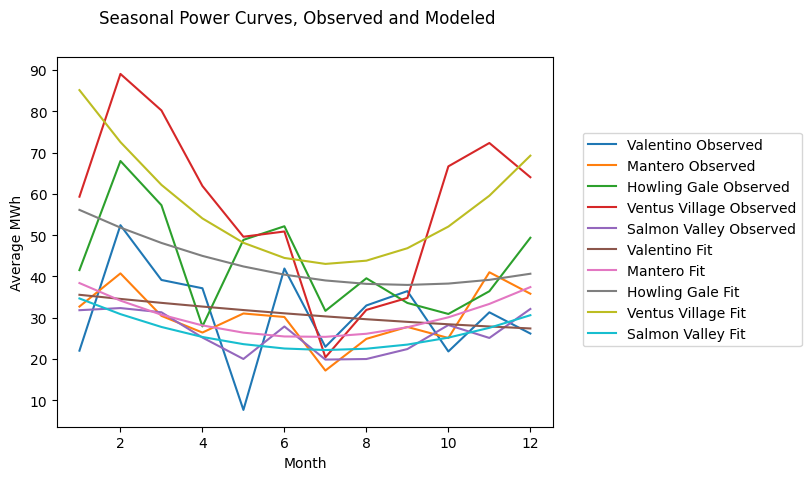

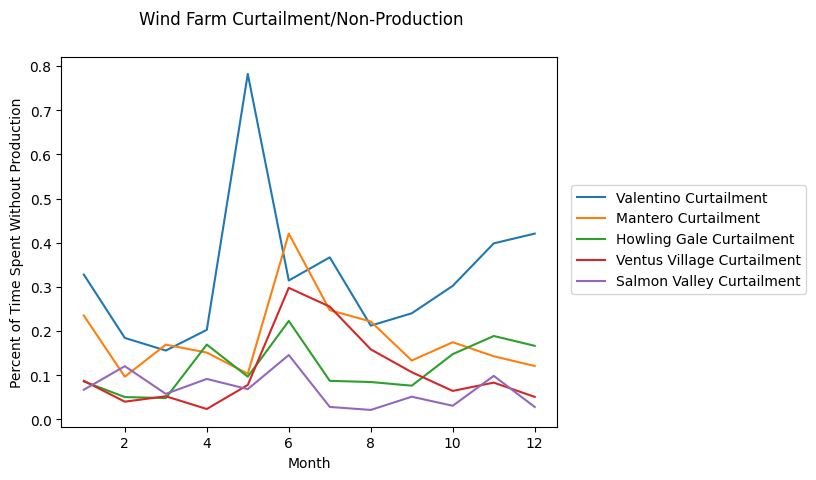

In [94]:
array_vals=[]
Valentino_counts=[]
Mantero_counts=[]
Howling_Gale_counts=[]
Ventus_Village_counts=[]
Salmon_Valley_counts=[]
for i in range (1,13):
    array_val = df.loc[df['Month']==i].loc[:,['Valentino Gen (MWh)\nMWh that were delivered to the grid from the project (substation level generation)','Mantero Gen (MWh)','Howling Gale Gen (MWh)','Ventus Village Gen (MWh)','Salmon Valley Gen (MWh)']]
    Valentino_counts.append(array_val['Valentino Gen (MWh)\nMWh that were delivered to the grid from the project (substation level generation)'].value_counts()[0])
    Mantero_counts.append(array_val['Mantero Gen (MWh)'].value_counts()[0])
    Howling_Gale_counts.append(array_val['Howling Gale Gen (MWh)'].value_counts()[0])
    Ventus_Village_counts.append(array_val['Ventus Village Gen (MWh)'].value_counts()[0])
    Salmon_Valley_counts.append(array_val['Salmon Valley Gen (MWh)'].value_counts()[0])
    array_val=array_val.sum().to_frame().T
    array_vals.append(array_val)   
monthly_sums=pd.concat(array_vals)
months=np.array([31*24,28*24,31*24,30*24,31*24,20*24,31*24,31*24,30*24,31*24,30*24,31*24])
Valentino_Gen_month=np.divide(np.array(monthly_sums["Valentino Gen (MWh)\nMWh that were delivered to the grid from the project (substation level generation)"]),months)
Mantero_Gen_month=np.divide(np.array(monthly_sums["Mantero Gen (MWh)"]),months)
Howling_Gale_Gen_month=np.divide(np.array(monthly_sums["Howling Gale Gen (MWh)"]),months)
Ventus_Village_Gen_month=np.divide(np.array(monthly_sums["Ventus Village Gen (MWh)"]),months)
Salmon_Valley_Gen_month=np.divide(np.array(monthly_sums["Salmon Valley Gen (MWh)"]),months)
x=np.linspace(1,12,num=12)
def fitter_func(x1,a,b,c):
    return a*(np.square(x1))+b*x1+c
Valentino_param, Valentino_param_cov=curve_fit(fitter_func,x,Valentino_Gen)
Mantero_param, Mantero_param_cov=curve_fit(fitter_func,x,Mantero_Gen)
Howling_Gale_param, Howling_Gale_param_cov=curve_fit(fitter_func,x,Howling_Gale_Gen)
Ventus_Village_param, Ventus_Village_param_cov=curve_fit(fitter_func,x,Ventus_Village_Gen)
Salmon_Valley_param, Salmon_Valley_param_cov=curve_fit(fitter_func,x,Salmon_Valley_Gen)
Valentino_Fit=fitter_func(x,Valentino_param[0],Valentino_param[1],Valentino_param[2])
Mantero_Fit=fitter_func(x,Mantero_param[0],Mantero_param[1],Mantero_param[2])
Howling_Gale_Fit=fitter_func(x,Howling_Gale_param[0],Howling_Gale_param[1],Howling_Gale_param[2])
Ventus_Village_Fit=fitter_func(x,Ventus_Village_param[0],Ventus_Village_param[1],Ventus_Village_param[2])
Salmon_Valley_Fit=fitter_func(x,Salmon_Valley_param[0],Salmon_Valley_param[1],Salmon_Valley_param[2])
fig,ax=plt.subplots()
ax.plot(x,Valentino_Gen_month,label='Valentino Observed')
ax.plot(x,Mantero_Gen_month,label='Mantero Observed')
ax.plot(x,Howling_Gale_Gen_month,label='Howling Gale Observed')
ax.plot(x,Ventus_Village_Gen_month,label='Ventus Village Observed')
ax.plot(x,Salmon_Valley_Gen_month,label='Salmon Valley Observed')
ax.plot(x,Valentino_Fit,label='Valentino Fit')
ax.plot(x,Mantero_Fit,label='Mantero Fit')
ax.plot(x,Howling_Gale_Fit,label='Howling Gale Fit')
ax.plot(x,Ventus_Village_Fit,label='Ventus Village Fit')
ax.plot(x,Salmon_Valley_Fit,label='Salmon Valley Fit')
ax.set_xlabel("Month")
ax.set_ylabel("Average MWh")
fig.suptitle("Seasonal Power Curves, Observed and Modeled")
fig.legend(loc='center right',bbox_to_anchor=(1.3,0.5))
print("Seasonal Variability Metrics")
print("Valentino Seasonal Generation Standard Deviation: "+str(np.std(Valentino_Gen_month)))
print("Mantero Seasonal Generation Standard Deviation: "+str(np.std(Mantero_Gen_month)))
print("Howling Gale Seasonal Generation Standard Deviation: "+str(np.std(Howling_Gale_Gen_month)))
print("Ventus Village Seasonal Generation Standard Deviation: "+str(np.std(Ventus_Village_Gen_month)))
print("Salmon Valley Seasonal Generation Standard Deviation: "+str(np.std(Salmon_Valley_Gen_month)))
fig,ax=plt.subplots()
ax.plot(x,np.divide(np.array(Valentino_counts),months),label='Valentino Curtailment')
ax.plot(x,np.divide(np.array(Mantero_counts),months),label='Mantero Curtailment')
ax.plot(x,np.divide(np.array(Howling_Gale_counts),months),label='Howling Gale Curtailment')
ax.plot(x,np.divide(np.array(Ventus_Village_counts),months),label='Ventus Village Curtailment')
ax.plot(x,np.divide(np.array(Salmon_Valley_counts),months),label='Salmon Valley Curtailment')
ax.set_xlabel("Month")
ax.set_ylabel("Percent of Time Spent Without Production")
fig.suptitle("Wind Farm Curtailment/Non-Production")
fig.legend(loc='center right',bbox_to_anchor=(1.3,0.5))

In [202]:
def monthly(input_array):
    output_array=[]
    output_array.append(np.sum(input_array[0:31]))
    output_array.append(np.sum(input_array[31:59]))
    output_array.append(np.sum(input_array[59:90]))
    output_array.append(np.sum(input_array[90:120]))
    output_array.append(np.sum(input_array[120:151]))
    output_array.append(np.sum(input_array[151:181]))
    output_array.append(np.sum(input_array[181:212]))
    output_array.append(np.sum(input_array[212:243]))
    output_array.append(np.sum(input_array[243:273]))
    output_array.append(np.sum(input_array[273:304]))
    output_array.append(np.sum(input_array[304:334]))
    output_array.append(np.sum(input_array[334:365]))
    return output_array
def battery_evaluation_model(params,site,only_curtailed=False,graphs=True):
    z=params[0]
    capacity=params[1]
    life=100
    battery_valentino=0
    battery_mantero=0
    battery_howling_gale=0
    battery_ventus_village=0
    battery_salmon_valley=0
    valentino_price_std=np.std(np.array(df["Valentino Price ($/MWh)\nPrice of the MWh that we are selling real time at the nodal level"]))
    mantero_price_std=np.std(np.array(df['Mantero Price ($/MWh)']))
    howling_gale_price_std=np.std(np.array(df['Howling Gale Price ($/MWh)']))
    ventus_village_price_std=np.std(np.array(df['Ventus Village Price ($/MWh)']))
    salmon_valley_price_std=np.std(np.array(df['Salmon Valley Price ($/MWh)']))
    valentino_price_mean=np.mean(np.array(df["Valentino Price ($/MWh)\nPrice of the MWh that we are selling real time at the nodal level"]))
    mantero_price_mean=np.mean(np.array(df['Mantero Gen (MWh)']))
    howling_gale_price_mean=np.mean(np.array(df['Howling Gale Price ($/MWh)']))
    ventus_village_price_mean=np.mean(np.array(df['Ventus Village Price ($/MWh)']))
    salmon_valley_price_mean=np.mean(np.array(df['Salmon Valley Price ($/MWh)']))
    
    valentino_battery_discharges=[]
    valentino_price_from_discharges=[]
    valentino_curtailed_hours=[]
    valentino_battery_charges=[]
    valentino_gens=[]
    
    mantero_battery_discharges=[]
    mantero_price_from_discharges=[]
    mantero_curtailed_hours=[]
    mantero_battery_charges=[]
    mantero_gens=[]
    
    howling_gale_battery_discharges=[]
    howling_gale_price_from_discharges=[]
    howling_gale_curtailed_hours=[]
    howling_gale_battery_charges=[]
    howling_gale_gens=[]
    
    ventus_village_battery_discharges=[]
    ventus_village_price_from_discharges=[]
    ventus_village_curtailed_hours=[]
    ventus_village_battery_charges=[]
    ventus_village_gens=[]
    
    salmon_valley_battery_discharges=[]
    salmon_valley_price_from_discharges=[]
    salmon_valley_curtailed_hours=[]
    salmon_valley_battery_charges=[]
    salmon_valley_gens=[]
    for i in range (1,8761):
        gen_array=df[i-1:i][["Valentino Gen (MWh)\nMWh that were delivered to the grid from the project (substation level generation)","Valentino Price ($/MWh)\nPrice of the MWh that we are selling real time at the nodal level",'Mantero Gen (MWh)','Mantero Price ($/MWh)','Howling Gale Gen (MWh)','Howling Gale Price ($/MWh)','Ventus Village Gen (MWh)','Ventus Village Price ($/MWh)','Salmon Valley Gen (MWh)','Salmon Valley Price ($/MWh)']]
        valentino_gen=float(gen_array["Valentino Gen (MWh)\nMWh that were delivered to the grid from the project (substation level generation)"].iloc[0])
        mantero_gen=float(gen_array['Mantero Gen (MWh)'].iloc[0])
        howling_gale_gen=float(gen_array['Howling Gale Gen (MWh)'].iloc[0])
        ventus_village_gen=float(gen_array['Ventus Village Gen (MWh)'].iloc[0])
        salmon_valley_gen=float(gen_array['Salmon Valley Gen (MWh)'].iloc[0])
        valentino_price=float(gen_array["Valentino Price ($/MWh)\nPrice of the MWh that we are selling real time at the nodal level"].iloc[0])
        mantero_price=float(gen_array['Mantero Price ($/MWh)'].iloc[0])
        howling_gale_price=float(gen_array['Howling Gale Price ($/MWh)'].iloc[0])
        ventus_village_price=float(gen_array['Ventus Village Price ($/MWh)'].iloc[0])
        salmon_valley_price=float(gen_array['Salmon Valley Price ($/MWh)'].iloc[0])

        valentino_gens.append(valentino_gen)
        valentino_battery_charge=0
        valentino_battery_discharge=0
        valentino_price_from_discharge=0
        valentino_curtailed_hour=0
        if valentino_price>=(z*valentino_price_std+valentino_price_mean) and battery_valentino>0:
            change = min(capacity/100,battery_valentino)
            battery_valentino+=(-change)
            valentino_battery_discharge+=change
            valentino_price_from_discharge+=change*valentino_price
        if only_curtailed and valentino_gen==0 and battery_valentino<capacity:
            change = min(capacity/100,capacity-battery_valentino,Valentino_Gen[i%12])
            battery_valentino+=change
            valentino_curtailed_hour=1
            valentino_battery_charge=change
        elif valentino_price<=(z*valentino_price_std+valentino_price_mean) and battery_valentino<capacity:
            change = min(capacity/100,capacity-battery_valentino)
            battery_valentino+=change
            valentino_price_from_discharge+=(-change*valentino_price)
            valentino_curtailed_hour=1
            valentino_battery_charge=change
        valentino_curtailed_hours.append(valentino_curtailed_hour)
        valentino_price_from_discharges.append(valentino_price_from_discharge)
        valentino_battery_discharges.append(valentino_battery_discharge)
        valentino_battery_charges.append(valentino_battery_charge)

        mantero_gens.append(mantero_gen)
        mantero_battery_charge=0
        mantero_battery_discharge=0
        mantero_price_from_discharge=0
        mantero_curtailed_hour=0
        if mantero_price>=(z*mantero_price_std+mantero_price_mean) and battery_mantero>0:
            change = min(capacity/100,battery_mantero)
            battery_mantero+=(-change)
            mantero_battery_discharge+=change
            mantero_price_from_discharge+=change*mantero_price
        if only_curtailed and mantero_gen==0 and battery_mantero<capacity:
            change = min(capacity/100,capacity-battery_mantero,Mantero_Gen[i%12])
            battery_mantero+=change
            mantero_curtailed_hour=1
            mantero_battery_charge=change
        elif mantero_price<=(z*mantero_price_std+mantero_price_mean) and battery_mantero<capacity:
            change = min(capacity/100,capacity-battery_mantero)
            battery_mantero+=change
            mantero_price_from_discharge+=(-change*mantero_price)
            mantero_curtailed_hour=1
            mantero_battery_charge=change
        mantero_curtailed_hours.append(mantero_curtailed_hour)
        mantero_price_from_discharges.append(mantero_price_from_discharge)
        mantero_battery_discharges.append(mantero_battery_discharge)
        mantero_battery_charges.append(mantero_battery_charge)

        howling_gale_gens.append(howling_gale_gen)
        howling_gale_battery_charge=0
        howling_gale_battery_discharge=0
        howling_gale_price_from_discharge=0
        howling_gale_curtailed_hour=0
        if howling_gale_price>=(z*howling_gale_price_std+howling_gale_price_mean) and battery_howling_gale>0:
            change = min(capacity/100,battery_howling_gale)
            battery_howling_gale+=(-change)
            howling_gale_battery_discharge+=change
            howling_gale_price_from_discharge+=change*howling_gale_price
        if only_curtailed and howling_gale_gen==0 and battery_howling_gale<capacity:
            change = min(capacity/100,capacity-battery_howling_gale,Howling_Gale_Gen[i%12])
            battery_howling_gale+=change
            howling_gale_curtailed_hour=1
            howling_gale_battery_charge=change
        elif howling_gale_price<=(z*howling_gale_price_std+howling_gale_price_mean) and battery_howling_gale<capacity:
            change = min(capacity/100,capacity-battery_howling_gale)
            battery_howling_gale+=change
            howling_gale_price_from_discharge+=(-change*howling_gale_price)
            howling_gale_curtailed_hour=1
            howling_gale_battery_charge=change
        howling_gale_curtailed_hours.append(howling_gale_curtailed_hour)
        howling_gale_price_from_discharges.append(howling_gale_price_from_discharge)
        howling_gale_battery_discharges.append(howling_gale_battery_discharge)
        howling_gale_battery_charges.append(howling_gale_battery_charge)

        ventus_village_gens.append(ventus_village_gen)
        ventus_village_battery_charge=0
        ventus_village_battery_discharge=0
        ventus_village_price_from_discharge=0
        ventus_village_curtailed_hour=0
        if ventus_village_price>=(z*ventus_village_price_std+ventus_village_price_mean) and battery_ventus_village>0:
            change = min(capacity/100,battery_ventus_village)
            battery_ventus_village+=(-change)
            ventus_village_battery_discharge+=change
            ventus_village_price_from_discharge+=change*ventus_village_price
        if only_curtailed and ventus_village_gen==0 and battery_ventus_village<capacity:
            change = min(capacity/100,capacity-battery_ventus_village,Ventus_Village_Gen[i%12])
            battery_ventus_village+=change
            ventus_village_curtailed_hour=1
            ventus_village_battery_charge=change
        elif ventus_village_price<=(z*ventus_village_price_std+ventus_village_price_mean) and battery_ventus_village<capacity:
            change = min(capacity/100,capacity-battery_ventus_village)
            battery_ventus_village+=change
            ventus_village_price_from_discharge+=(-change*ventus_village_price)
            ventus_village_curtailed_hour=1
            ventus_village_battery_charge=change
        ventus_village_curtailed_hours.append(ventus_village_curtailed_hour)
        ventus_village_price_from_discharges.append(ventus_village_price_from_discharge)
        ventus_village_battery_discharges.append(ventus_village_battery_discharge)
        ventus_village_battery_charges.append(ventus_village_battery_charge)

        salmon_valley_gens.append(salmon_valley_gen)
        salmon_valley_battery_charge=0
        salmon_valley_battery_discharge=0
        salmon_valley_price_from_discharge=0
        salmon_valley_curtailed_hour=0
        if salmon_valley_price>=(z*salmon_valley_price_std+salmon_valley_price_mean) and battery_salmon_valley>0:
            change = min(capacity/100,battery_salmon_valley)
            battery_salmon_valley+=(-change)
            salmon_valley_battery_discharge+=change
            salmon_valley_price_from_discharge+=change*salmon_valley_price
        if only_curtailed and salmon_valley_gen==0 and battery_salmon_valley<capacity:
            change = min(capacity/100,capacity-battery_salmon_valley,Salmon_Valley_Gen[i%12])
            battery_salmon_valley+=change
            salmon_valley_curtailed_hour=1
            salmon_valley_battery_charge=change
        elif salmon_valley_price<=(z*salmon_valley_price_std+salmon_valley_price_mean) and battery_salmon_valley<capacity:
            change = min(capacity/100,capacity-battery_salmon_valley)
            battery_salmon_valley+=change
            salmon_valley_price_from_discharge+=(-change*salmon_valley_price)
            salmon_valley_curtailed_hour=1
            salmon_valley_battery_charge=change
        salmon_valley_curtailed_hours.append(salmon_valley_curtailed_hour)
        salmon_valley_price_from_discharges.append(salmon_valley_price_from_discharge)
        salmon_valley_battery_discharges.append(salmon_valley_battery_discharge)
        salmon_valley_battery_charges.append(salmon_valley_battery_charge)

    if graphs:
        x=np.linspace(1,24,num=24)
        x1=np.linspace(1,12,num=12)
        months=np.array([31*24,28*24,31*24,30*24,31*24,20*24,31*24,31*24,30*24,31*24,30*24,31*24])
        valentino_reshaped_discharges=np.reshape(np.add(np.array(valentino_battery_discharges),np.array(valentino_gens)),(24,-1))
        valentino_battery_discharges=np.reshape(np.array(valentino_battery_discharges),(24,-1))
        valentino_price_from_discharges=np.reshape(np.array(valentino_price_from_discharges),(24,-1))
        valentino_curtailed_hours=np.reshape(np.array(valentino_curtailed_hours),(24,-1))
        valentino_battery_charges=np.reshape(np.array(valentino_battery_charges),(24,-1))
        valentino_battery_discharges_hourly=np.sum(valentino_battery_discharges,axis=1)/365
        valentino_price_from_discharges_hourly=np.sum(valentino_price_from_discharges,axis=1)/365
        valentino_curtailed_hours_hourly=np.sum(valentino_curtailed_hours,axis=1)/365
        valentino_battery_charges_hourly=np.sum(valentino_battery_charges,axis=1)/365
        valentino_battery_discharges_daily=np.reshape(np.sum(valentino_battery_discharges,axis=0),-1)
        valentino_price_from_discharges_daily=np.reshape(np.sum(valentino_price_from_discharges,axis=0),-1)
        valentino_curtailed_hours_daily=np.reshape(np.sum(valentino_curtailed_hours,axis=0),-1)
        valentino_battery_charges_daily=np.reshape(np.sum(valentino_battery_charges,axis=0),-1)
        valentino_battery_discharges_monthly=np.divide(np.array(monthly(valentino_battery_discharges_daily)),months)
        valentino_price_from_discharges_monthly=np.divide(np.array(monthly(valentino_price_from_discharges_daily)),months)
        valentino_curtailed_hours_monthly=np.divide(np.array(monthly(valentino_curtailed_hours_daily)),months)
        valentino_battery_charges_monthly=np.divide(np.array(monthly(valentino_battery_charges_daily)),months)
        
        mantero_reshaped_discharges=np.reshape(np.add(np.array(mantero_battery_discharges),np.array(mantero_gens)),(24,-1))
        mantero_battery_discharges=np.reshape(np.array(mantero_battery_discharges),(24,-1))
        mantero_price_from_discharges=np.reshape(np.array(mantero_price_from_discharges),(24,-1))
        mantero_curtailed_hours=np.reshape(np.array(mantero_curtailed_hours),(24,-1))
        mantero_battery_charges=np.reshape(np.array(mantero_battery_charges),(24,-1))
        mantero_battery_discharges_hourly=np.sum(mantero_battery_discharges,axis=1)/365
        mantero_price_from_discharges_hourly=np.sum(mantero_price_from_discharges,axis=1)/365
        mantero_curtailed_hours_hourly=np.sum(mantero_curtailed_hours,axis=1)/365
        mantero_battery_charges_hourly=np.sum(mantero_battery_charges,axis=1)/365
        mantero_battery_discharges_daily=np.reshape(np.sum(mantero_battery_discharges,axis=0),-1)
        mantero_price_from_discharges_daily=np.reshape(np.sum(mantero_price_from_discharges,axis=0),-1)
        mantero_curtailed_hours_daily=np.reshape(np.sum(mantero_curtailed_hours,axis=0),-1)
        mantero_battery_charges_daily=np.reshape(np.sum(mantero_battery_charges,axis=0),-1)
        mantero_battery_discharges_monthly=np.divide(np.array(monthly(mantero_battery_discharges_daily)),months)
        mantero_price_from_discharges_monthly=np.divide(np.array(monthly(mantero_price_from_discharges_daily)),months)
        mantero_curtailed_hours_monthly=np.divide(np.array(monthly(mantero_curtailed_hours_daily)),months)
        mantero_battery_charges_monthly=np.divide(np.array(monthly(mantero_battery_charges_daily)),months)

        howling_gale_reshaped_discharges=np.reshape(np.add(np.array(howling_gale_battery_discharges),np.array(howling_gale_gens)),(24,-1))
        howling_gale_battery_discharges=np.reshape(np.array(howling_gale_battery_discharges),(24,-1))
        howling_gale_price_from_discharges=np.reshape(np.array(howling_gale_price_from_discharges),(24,-1))
        howling_gale_curtailed_hours=np.reshape(np.array(howling_gale_curtailed_hours),(24,-1))
        howling_gale_battery_charges=np.reshape(np.array(howling_gale_battery_charges),(24,-1))
        howling_gale_battery_discharges_hourly=np.sum(howling_gale_battery_discharges,axis=1)/365
        howling_gale_price_from_discharges_hourly=np.sum(howling_gale_price_from_discharges,axis=1)/365
        howling_gale_curtailed_hours_hourly=np.sum(howling_gale_curtailed_hours,axis=1)/365
        howling_gale_battery_charges_hourly=np.sum(howling_gale_battery_charges,axis=1)/365
        howling_gale_battery_discharges_daily=np.reshape(np.sum(howling_gale_battery_discharges,axis=0),-1)
        howling_gale_price_from_discharges_daily=np.reshape(np.sum(howling_gale_price_from_discharges,axis=0),-1)
        howling_gale_curtailed_hours_daily=np.reshape(np.sum(howling_gale_curtailed_hours,axis=0),-1)
        howling_gale_battery_charges_daily=np.reshape(np.sum(howling_gale_battery_charges,axis=0),-1)
        howling_gale_battery_discharges_monthly=np.divide(np.array(monthly(howling_gale_battery_discharges_daily)),months)
        howling_gale_price_from_discharges_monthly=np.divide(np.array(monthly(howling_gale_price_from_discharges_daily)),months)
        howling_gale_curtailed_hours_monthly=np.divide(np.array(monthly(howling_gale_curtailed_hours_daily)),months)
        howling_gale_battery_charges_monthly=np.divide(np.array(monthly(howling_gale_battery_charges_daily)),months)

        ventus_village_reshaped_discharges=np.reshape(np.add(np.array(ventus_village_battery_discharges),np.array(ventus_village_gens)),(24,-1))
        ventus_village_battery_discharges=np.reshape(np.array(ventus_village_battery_discharges),(24,-1))
        ventus_village_price_from_discharges=np.reshape(np.array(ventus_village_price_from_discharges),(24,-1))
        ventus_village_curtailed_hours=np.reshape(np.array(ventus_village_curtailed_hours),(24,-1))
        ventus_village_battery_charges=np.reshape(np.array(ventus_village_battery_charges),(24,-1))
        ventus_village_battery_discharges_hourly=np.sum(ventus_village_battery_discharges,axis=1)/365
        ventus_village_price_from_discharges_hourly=np.sum(ventus_village_price_from_discharges,axis=1)/365
        ventus_village_curtailed_hours_hourly=np.sum(ventus_village_curtailed_hours,axis=1)/365
        ventus_village_battery_charges_hourly=np.sum(ventus_village_battery_charges,axis=1)/365
        ventus_village_battery_discharges_daily=np.reshape(np.sum(ventus_village_battery_discharges,axis=0),-1)
        ventus_village_price_from_discharges_daily=np.reshape(np.sum(ventus_village_price_from_discharges,axis=0),-1)
        ventus_village_curtailed_hours_daily=np.reshape(np.sum(ventus_village_curtailed_hours,axis=0),-1)
        ventus_village_battery_charges_daily=np.reshape(np.sum(ventus_village_battery_charges,axis=0),-1)
        ventus_village_battery_discharges_monthly=np.divide(np.array(monthly(ventus_village_battery_discharges_daily)),months)
        ventus_village_price_from_discharges_monthly=np.divide(np.array(monthly(ventus_village_price_from_discharges_daily)),months)
        ventus_village_curtailed_hours_monthly=np.divide(np.array(monthly(ventus_village_curtailed_hours_daily)),months)
        ventus_village_battery_charges_monthly=np.divide(np.array(monthly(ventus_village_battery_charges_daily)),months)

        salmon_valley_reshaped_discharges=np.reshape(np.add(np.array(salmon_valley_battery_discharges),np.array(salmon_valley_gens)),(24,-1))
        salmon_valley_battery_discharges=np.reshape(np.array(salmon_valley_battery_discharges),(24,-1))
        salmon_valley_price_from_discharges=np.reshape(np.array(salmon_valley_price_from_discharges),(24,-1))
        salmon_valley_curtailed_hours=np.reshape(np.array(salmon_valley_curtailed_hours),(24,-1))
        salmon_valley_battery_charges=np.reshape(np.array(salmon_valley_battery_charges),(24,-1))
        salmon_valley_battery_discharges_hourly=np.sum(salmon_valley_battery_discharges,axis=1)/365
        salmon_valley_price_from_discharges_hourly=np.sum(salmon_valley_price_from_discharges,axis=1)/365
        salmon_valley_curtailed_hours_hourly=np.sum(salmon_valley_curtailed_hours,axis=1)/365
        salmon_valley_battery_charges_hourly=np.sum(salmon_valley_battery_charges,axis=1)/365
        salmon_valley_battery_discharges_daily=np.reshape(np.sum(salmon_valley_battery_discharges,axis=0),-1)
        salmon_valley_price_from_discharges_daily=np.reshape(np.sum(salmon_valley_price_from_discharges,axis=0),-1)
        salmon_valley_curtailed_hours_daily=np.reshape(np.sum(salmon_valley_curtailed_hours,axis=0),-1)
        salmon_valley_battery_charges_daily=np.reshape(np.sum(salmon_valley_battery_charges,axis=0),-1)
        salmon_valley_battery_discharges_monthly=np.divide(np.array(monthly(salmon_valley_battery_discharges_daily)),months)
        salmon_valley_price_from_discharges_monthly=np.divide(np.array(monthly(salmon_valley_price_from_discharges_daily)),months)
        salmon_valley_curtailed_hours_monthly=np.divide(np.array(monthly(salmon_valley_curtailed_hours_daily)),months)
        salmon_valley_battery_charges_monthly=np.divide(np.array(monthly(salmon_valley_battery_charges_daily)),months)

        fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        ax1.plot(x,valentino_battery_discharges_hourly,label='Valentino')
        ax1.plot(x,mantero_battery_discharges_hourly,label='Mantero')
        ax1.plot(x,howling_gale_battery_discharges_hourly,label='Howling Gale')
        ax1.plot(x,ventus_village_battery_discharges_hourly,label='Ventus Village')
        ax1.plot(x,salmon_valley_battery_discharges_hourly,label='Salmon Valley')
        ax1.set_xlabel("Hour")
        ax1.set_ylabel("MWh/hr")
        ax1.set_title("Hourly Battery Discharges")
        ax2.plot(x,valentino_price_from_discharges_hourly)
        ax2.plot(x,mantero_price_from_discharges_hourly)
        ax2.plot(x,howling_gale_price_from_discharges_hourly)
        ax2.plot(x,ventus_village_price_from_discharges_hourly)
        ax2.plot(x,salmon_valley_price_from_discharges_hourly)
        ax2.set_xlabel("Hour")
        ax2.set_ylabel("$/hr")
        ax2.set_title("Hourly Battery Revenue")
        ax3.plot(x,valentino_curtailed_hours_hourly)
        ax3.plot(x,mantero_curtailed_hours_hourly)
        ax3.plot(x,howling_gale_curtailed_hours_hourly)
        ax3.plot(x,ventus_village_curtailed_hours_hourly)
        ax3.plot(x,salmon_valley_curtailed_hours_hourly)
        ax3.set_xlabel("Hour")
        ax3.set_ylabel("Counts")
        ax3.set_title("Hourly Battery Non-Curtailments")
        ax4.plot(x,valentino_battery_charges_hourly)
        ax4.plot(x,mantero_battery_charges_hourly)
        ax4.plot(x,howling_gale_battery_charges_hourly)
        ax4.plot(x,ventus_village_battery_charges_hourly)
        ax4.plot(x,salmon_valley_battery_charges_hourly)
        ax4.set_xlabel("Hour")
        ax4.set_ylabel("MWh/hr")
        ax4.set_title("Hourly Battery Charges")
        fig.legend(loc='center right',bbox_to_anchor=(1.2,0.5))

        fig1,((ax11,ax12),(ax13,ax14))=plt.subplots(2,2)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        ax11.plot(x1,valentino_battery_discharges_monthly,label='Valentino')
        ax11.plot(x1,mantero_battery_discharges_monthly,label='Mantero')
        ax11.plot(x1,howling_gale_battery_discharges_monthly,label='Howling Gale')
        ax11.plot(x1,ventus_village_battery_discharges_monthly,label='Ventus Village')
        ax11.plot(x1,salmon_valley_battery_discharges_monthly,label='Salmon Valley')
        ax11.set_xlabel("Hour")
        ax11.set_ylabel("MWh/hr")
        ax11.set_title("Monthly Battery Discharges")
        ax12.plot(x1,valentino_price_from_discharges_monthly)
        ax12.plot(x1,mantero_price_from_discharges_monthly)
        ax12.plot(x1,howling_gale_price_from_discharges_monthly)
        ax12.plot(x1,ventus_village_price_from_discharges_monthly)
        ax12.plot(x1,salmon_valley_price_from_discharges_monthly)
        ax12.set_xlabel("Hour")
        ax12.set_ylabel("$/hr")
        ax12.set_title("Monthly Battery Revenue")
        ax13.plot(x1,valentino_curtailed_hours_monthly)
        ax13.plot(x1,mantero_curtailed_hours_monthly)
        ax13.plot(x1,howling_gale_curtailed_hours_monthly)
        ax13.plot(x1,ventus_village_curtailed_hours_monthly)
        ax13.plot(x1,salmon_valley_curtailed_hours_monthly)
        ax13.set_xlabel("Hour")
        ax13.set_ylabel("Counts")
        ax13.set_title("Monthly Battery Non-Curtailments")
        ax14.plot(x1,valentino_battery_charges_monthly)
        ax14.plot(x1,mantero_battery_charges_monthly)
        ax14.plot(x1,howling_gale_battery_charges_monthly)
        ax14.plot(x1,ventus_village_battery_charges_monthly)
        ax14.plot(x1,salmon_valley_battery_charges_monthly)
        ax14.set_xlabel("Hour")
        ax14.set_ylabel("MWh/hr")
        ax14.set_title("Monthly Battery Charges")
        fig1.legend(loc='center right',bbox_to_anchor=(1.2,0.5))
        
        print("Valentino Daily Standard Deviation: "+str(np.std(np.sum(valentino_reshaped_discharges,axis=1)/365)))
        print("Valentino Monthly Standard Deviation: "+str(np.std(np.sum(valentino_reshaped_discharges,axis=0)/30)))
        print("Valentino Total Extra Revenue: "+str(np.sum(valentino_price_from_discharges)))
        print("Valentino Curtailment Reduction: "+str(np.sum(valentino_curtailed_hours)))
        print("Valentino Extra Grid Utilization: "+str(np.sum(valentino_battery_discharges)))

        print("Mantero Daily Standard Deviation: "+str(np.std(np.sum(mantero_reshaped_discharges,axis=1)/365)))
        print("Mantero Monthly Standard Deviation: "+str(np.std(np.sum(mantero_reshaped_discharges,axis=0)/30)))
        print("Mantero Total Extra Revenue: "+str(np.sum(mantero_price_from_discharges)))
        print("Mantero Curtailment Reduction: "+str(np.sum(mantero_curtailed_hours)))
        print("Mantero Extra Grid Utilization: "+str(np.sum(mantero_battery_discharges)))

        print("Howling Gale Daily Standard Deviation: "+str(np.std(np.sum(howling_gale_reshaped_discharges,axis=1)/365)))
        print("Howling Gale Monthly Standard Deviation: "+str(np.std(np.sum(howling_gale_reshaped_discharges,axis=0)/30)))
        print("Howling Gale Total Extra Revenue: "+str(np.sum(howling_gale_price_from_discharges)))
        print("Howling Gale Curtailment Reduction: "+str(np.sum(howling_gale_curtailed_hours)))
        print("Howling Gale Extra Grid Utilization: "+str(np.sum(howling_gale_battery_discharges)))

        print("Ventus Village Daily Standard Deviation: "+str(np.std(np.sum(ventus_village_reshaped_discharges,axis=1)/365)))
        print("Ventus Village Monthly Standard Deviation: "+str(np.std(np.sum(ventus_village_reshaped_discharges,axis=0)/30)))
        print("Ventus Village Total Extra Revenue: "+str(np.sum(ventus_village_price_from_discharges)))
        print("Ventus Village Curtailment Reduction: "+str(np.sum(ventus_village_curtailed_hours)))
        print("Ventus Village Extra Grid Utilization: "+str(np.sum(ventus_village_battery_discharges)))

        print("Salmon Valley Daily Standard Deviation: "+str(np.std(np.sum(salmon_valley_reshaped_discharges,axis=1)/365)))
        print("Salmon Valley Monthly Standard Deviation: "+str(np.std(np.sum(salmon_valley_reshaped_discharges,axis=0)/30)))
        print("Salmon Valley Total Extra Revenue: "+str(np.sum(salmon_valley_price_from_discharges)))
        print("Salmon Valley Curtailment Reduction: "+str(np.sum(salmon_valley_curtailed_hours)))
        print("Salmon Valley Extra Grid Utilization: "+str(np.sum(salmon_valley_battery_discharges)))

    else:
        total_prices=[np.sum(np.array(valentino_price_from_discharges)),np.sum(np.array(mantero_price_from_discharges)),np.sum(np.array(howling_gale_price_from_discharges)),np.sum(np.array(ventus_village_price_from_discharges)),np.sum(np.array(salmon_valley_price_from_discharges))]
        print("Another iteration done!")
        return 10000000-total_prices[site]

In [ ]:
x0=[0.5,600]
valentino_res = minimize(battery_evaluation_model, x0, method='nelder-mead',bounds = ((0,1), (400,800)),args=(0,True,False),options={'disp': True})
print("Valentino Optimal Parameters (Z-Score and Capacity): "+str(valentino_res[0])+" "+str(valentino_res[1]))
mantero_res = minimize(battery_evaluation_model, x0, method='nelder-mead',bounds = ((0,1), (400,800)),args=(1,True,False),options={'disp': True})
print("Mantero Optimal Parameters (Z-Score and Capacity): "+str(mantero_res[0])+" "+str(mantero_res[1]))
howling_gale_res = minimize(battery_evaluation_model, x0, method='nelder-mead',bounds = ((0,1), (400,800)),args=(2,True,False),options={'disp': True})
print("Howling Gale Optimal Parameters (Z-Score and Capacity): "+str(howling_gale_res[0])+" "+str(howling_gale_res[1]))
ventus_village_res = minimize(battery_evaluation_model, x0, method='nelder-mead',bounds = ((0,1), (400,800)),args=(3,True,False),options={'disp': True})
print("Ventus Village Optimal Parameters (Z-Score and Capacity): "+str(ventus_village_res[0])+" "+str(ventus_village_res[1]))
salmon_valley_res = minimize(battery_evaluation_model, x0, method='nelder-mead',bounds = ((0,1), (400,800)),args=(4,True,False),options={'disp': True})
print("Salmon Valley Optimal Parameters (Z-Score and Capacity): "+str(salmon_valley_res[0])+" "+str(salmon_valley_res[1]))

Another iteration done!
Another iteration done!
Another iteration done!
Another iteration done!
Another iteration done!
Another iteration done!
Another iteration done!


In [ ]:
#to get it to run call:
#battery_evaluation_model([zscore,capacity],0,False,True)
#it will report for all types